In [5]:
from main.manipulate_data import add_noise_to_audio
from main.helpers import get_numpy_data
from main.constants import DATA_PROCESSED, NOISE_PROCESSED, SAMPLE_RATE
import matplotlib.pyplot as plt
import librosa.display
import librosa as lr
import numpy as np

In [6]:
# Laden der vorverarbeiteten Rausch- und Audioaufnahmen
noise_numpy = get_numpy_data(NOISE_PROCESSED)
audio_numpy = get_numpy_data(DATA_PROCESSED)

print("Rauschen:",noise_numpy.shape)
print("Audio:",audio_numpy.shape)


Rauschen: (100, 80000)
Audio: (72, 80000)


In [7]:
# Erstellen des Tensors
input_data = add_noise_to_audio(audio_numpy,noise_numpy)
print("Tensor:", input_data.shape)

Tensor: (72, 100, 80000)


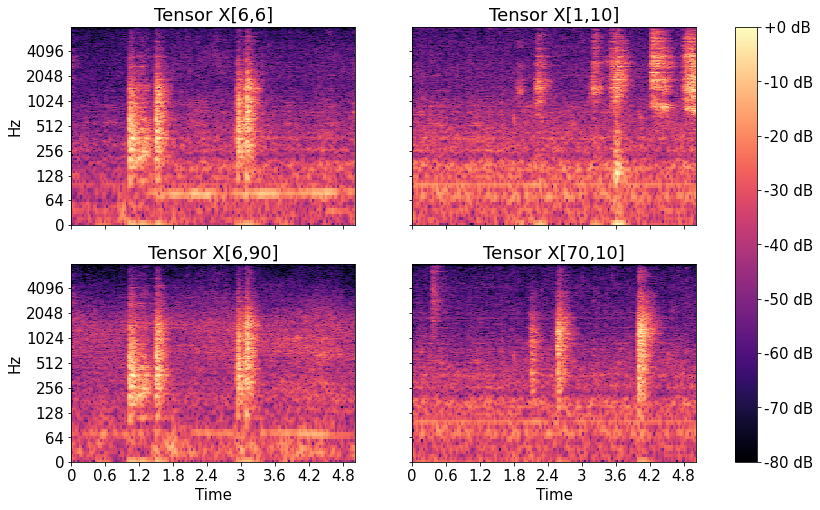

In [8]:
# Just a plot can be ignored
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,8))

D_w = lr.amplitude_to_db(np.abs(lr.stft(input_data[6,6])), ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[0,0])
plt.sca(ax[0,0])
plt.yticks(size=15)
plt.xticks(size=15)
ax[0,0].set_xlabel(None)
ax[0,0].set_xticklabels([])
plt.ylabel("Hz",size=15)
plt.title("Tensor X[6,6]",size=18)

D_a = lr.amplitude_to_db(np.abs(lr.stft(input_data[1,10])), ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[0,1])
plt.sca(ax[0,1])
plt.xticks(size=15)
ax[0,1].set_xticklabels([])
ax[0,1].set_xlabel(None)
ax[0,1].set_yticklabels([])
ax[0,1].set_ylabel(None)
plt.title("Tensor X[1,10]",size=18)

D_a = lr.amplitude_to_db(np.abs(lr.stft(input_data[6,90])), ref=np.max)
img_3 = lr.display.specshow(D_a,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[1,0])
plt.sca(ax[1,0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
plt.title("Tensor X[6,90]",size=18)

D_w = lr.amplitude_to_db(np.abs(lr.stft(input_data[70,10])), ref=np.max)
img = lr.display.specshow(D_w,y_axis="log", x_axis="time",sr=SAMPLE_RATE,ax=ax[1,1])
plt.sca(ax[1,1])
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
ax[1,1].set_ylabel(None)
ax[1,1].set_yticklabels([])
plt.title("Tensor X[70,10]",size=18)

# fancy colorbar
cb = fig.colorbar(img,ax=ax,format="%+2.f dB")
for t in cb.ax.get_yticklabels():
    t.set_fontsize(15)
#plt.savefig("tensor.pdf",dpi=300,bbox_inches="tight",transparent=True)